# **Project Name**    - Amazon Delivery Time Prediction



##### **Project Type**    - EDA + Regression


# **Project Summary -**

This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



1.	**Data Preparation:**
  
    ○	Load and preprocess the dataset.
  
    ○	Handle missing or inconsistent data.
  
    ○	Perform feature engineering (e.g., calculating distance between store and drop locations).
3.	**Data Cleaning:**
  
    ○	Remove duplicates and handle missing values.
  
    ○	Standardize categorical variables (e.g., weather, traffic).

5.	**Exploratory Data Analysis (EDA):**
  
    ○	Analyze trends in delivery times, agent performance, and external factors.
  
    ○	Visualize the impact of traffic, weather, and other variables on delivery times.
7.	**Feature Engineering:**
  
    ○	Calculate geospatial distances using store and drop coordinates.
  
    ○	Extract time-based features (e.g., hour of day, day of the week).
9.	**Regression Model Development:**
   
    ○	Train multiple regression models, including:
  
        ■	Linear Regression
        ■	Random Forest Regressor
        ■	Gradient Boosting Regressor
    ○	Evaluate models using metrics like RMSE, MAE, and R-squared.
  
    ○	Compare models and track performance metrics using MLflow.
11.	**Application Development:**
   
    ○	Build a user interface using Streamlit to:
   
        ■	Input order details (e.g., distance, traffic, weather, etc.).
        ■	Display predicted delivery times.
13.	**Model Comparison and Tracking:**
   
    ○	Use MLflow to log, compare, and manage different regression models.
   
    ○	Document the hyperparameters, performance metrics, and model versions.
15.	**Deployment:**
   
    ○	Deploy the application in streamlit for accessibility and scalability.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#data processing for ml 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

#importing the ML models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#imprting metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#for ML flow 
import mlflow
import mlflow.sklearn

#for hyperparameter optimisaiton

import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner


### Dataset Loading

In [86]:
df = pd.read_csv(r"amazon_delivery_week3.csv")

### Dataset First View

In [87]:
# Dataset First Look
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### Dataset Rows & Columns count

In [88]:
# Dataset Rows & Columns count

df.shape

(43739, 16)

### Dataset Information

In [89]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


#### Duplicate Values

In [90]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [91]:
# Missing Values/Null Values Count
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

### What did you know about your dataset?

'Weather' is a categorical variable that has values such as "Sunny", "Cloudy" hence we will impute this using mode.

"Agent_Rating" is a numeric variable hence we will impute this using mean.

## ***2. Understanding Your Variables***

In [92]:
# Dataset Columns
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [93]:
# Dataset Describe
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


### Variables Description

The dataset contains detailed information about orders, agents, and delivery conditions:

    ●	Order_ID: Unique identifier for each order.
    ●	Agent_Age: Age of the delivery agent.
    ●	Agent_Rating: Rating of the delivery agent.
    ●	Store_Latitude/Longitude: Geographic location of the store.
    ●	Drop_Latitude/Longitude: Geographic location of the delivery address.
    ●	Order_Date/Order_Time: Date and time when the order was placed.
    ●	Pickup_Time: Time when the delivery agent picked up the order.
    ●	Weather: Weather conditions during delivery.
    ●	Traffic: Traffic conditions during delivery.
    ●	Vehicle: Mode of transportation used for delivery.
    ●	Area: Type of delivery area (Urban/Metropolitan).
    ●	Delivery_Time: Target variable representing the actual time taken for delivery (in hours).
    ●	Category: Category of the product being delivered.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [94]:

# For categorical column 'Weather' -> use mode
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

# For numeric column 'Agent_Rating' -> use mean
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19924\4113272816.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19924\4113272816.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [95]:
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

### Computing distance using haversine formula 

Using the haversine distance function we can calculate distance from latitudes and longitudes. 

In [96]:
# Haversine distance function (in km)
def haversine_array(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df["Distance_km"] = haversine_array(df["Store_Latitude"].values,
                                     df["Store_Longitude"].values,
                                     df["Drop_Latitude"].values,
                                     df["Drop_Longitude"].values)



In [97]:
(df["Distance_km"] == 0).sum()


0

In [98]:
(df["Traffic"] == 'NaN').sum()

0

In [99]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138


In [100]:
columns_to_drop = ['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']
df = df.drop(columns=columns_to_drop, axis=1)
df.head()

,Order_ID,Agent_Age,Agent_Rating,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
0,ialx566343618,37,4.9,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758
3,rjto796129700,38,4.7,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,zguw716275638,32,4.6,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory Data Analysis (EDA)
Analyze trends and insights in the dataset, including:
●	Distribution of delivery times.
●	Impact of weather and traffic on delivery times.
●	Relationship between distance and delivery time.
●	Agent performance across various conditions.

Key Visualizations:
●	Bar charts for delivery times by product category.
●	Scatter plots for distance vs. delivery time.
●	Heatmaps to visualize correlations (e.g., agent rating and delivery time).

notes: 
Univaritae analysis : 
    - weather pie chart 
    - category bar chart with counts 
    - delivery time distrbution

bivariate analysis: 
    - weather vs delivery time 
    - traffic vs delivery time 
    - distance vs delivery time 
    - perforamce vs weather 
    - delivery times by product 
    - heatmaps (like agent raitng vs delivery time)

### Univariate Analysis 

#### Chart - 1: Category bar chart 

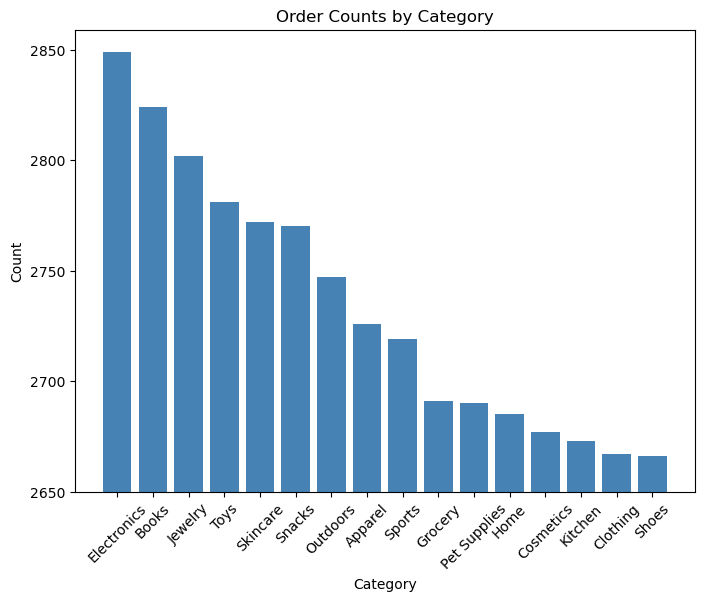

In [101]:
# Chart - 1 visualization code

# Count categories
category_counts = df['Category'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color='steelblue')

# Labels and title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Order Counts by Category")
plt.xticks(rotation=45)

# Set y-axis to start at 2650 and go up in increments of 50
plt.ylim(2650, category_counts.max() + 10)
plt.yticks(np.arange(2650, category_counts.max() + 10, 50))

# Show chart
plt.show()

##### 1. Why did you pick the specific chart?
##### 2. What is/are the insight(s) found from the chart?
##### 3. Will the gained insights help creating a positive business impact?

I chose a bar chart to visualise the number of items for each category. Electronics is the most popular category whilst shoes are the least popular. The business could investigate less popular products. 

Answer Here

#### Chart - 2: Delivery Time histogram

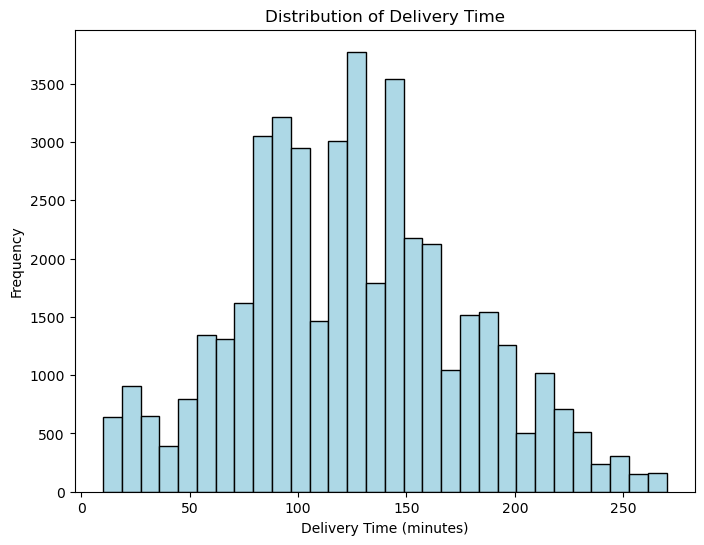

In [102]:
# Chart - 2 visualization code
# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df['Delivery_Time'], bins=30, edgecolor='black', color='lightblue')

# Labels and title
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")

plt.show()

##### 1. Why did you pick the specific chart?
##### 2. What is/are the insight(s) found from the chart?
##### 3. Will the gained insights help creating a positive business impact?

I chose a historgram to visualise the distribution of delivery times , what is the mean and spread of the data etc. The mean is around 100-150 minutes and there is an approximately 250 minute spread between the lowest and highest times. The business could look into higher wait times and investigate why they happen. 

#### Chart - 3: Pie chart visualisations 

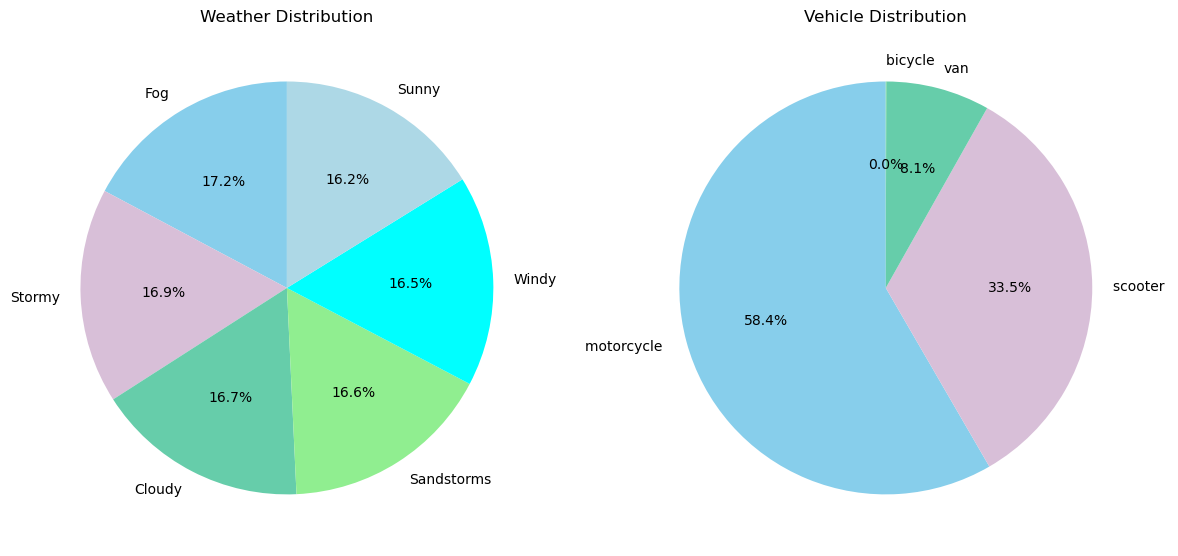

In [103]:
# Chart - 3 visualization code
# Counts
weather_counts = df['Weather'].value_counts()
vehicle_counts = df['Vehicle'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors_pie = ['skyblue', 'thistle', 'mediumaquamarine', 'lightgreen', 'cyan', 'lightblue']
# Weather pie chart
axes[0].pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors = colors_pie)
axes[0].set_title("Weather Distribution")
# Vehicle pie chart
axes[1].pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors = colors_pie)
axes[1].set_title("Vehicle Distribution")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart? Insights? Business impact? 

I chose pie charts to visualise the proportion of each category of both vehicle types and weather descriptions. For the first pie chart on the left we can see that the weather types are roughly equally distributed. For vehicles we can see motorcycles are the most popular mode of transport and scooter is next. The business could look into if scooters or motorcyles are more efficient / quick at deliveries. 

### Bivariate analysis 

#### Chart - 5

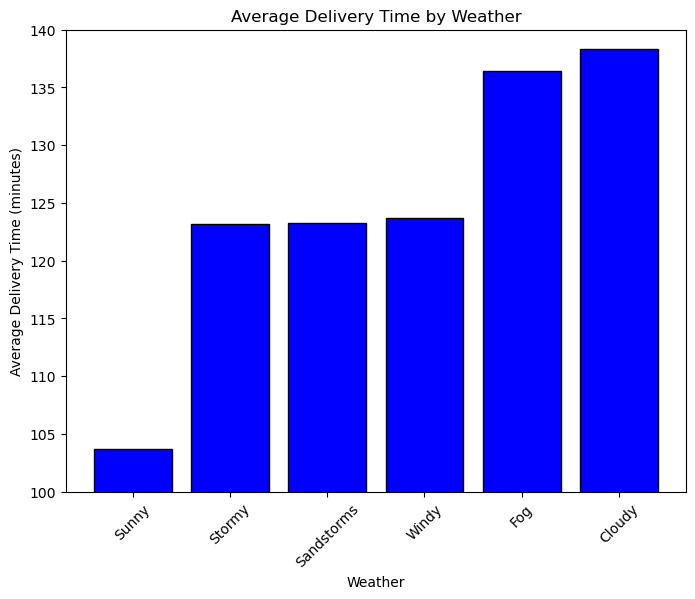

In [104]:
# Chart - 4 visualization code
# Group by Weather and calculate mean Delivery_Time
weather_delivery = df.groupby('Weather')['Delivery_Time'].mean().sort_values()

# Plot
plt.figure(figsize=(8,6))
plt.bar(weather_delivery.index, weather_delivery.values, color='blue', edgecolor='black')

# Labels and title
plt.xlabel("Weather")
plt.ylabel("Average Delivery Time (minutes)")
plt.title("Average Delivery Time by Weather")
plt.xticks(rotation=45)

# Y-axis from 100 to 140 with increments of 5
plt.ylim(100, 140)
plt.yticks(np.arange(100, 141, 5))

plt.show()

##### 1. Why did you pick the specific chart?
##### 2. What is/are the insight(s) found from the chart?
##### 3. Will the gained insights help creating a positive business impact?

I chose a bar chart to visualise and compare average delivery times against weather descriptors. As we can see, when it's cloudy average delivery times are much higher than when it is sunny. The business could look into trying to optimise delivery times when it is cloudy/ foggy . 

#### Chart - 6

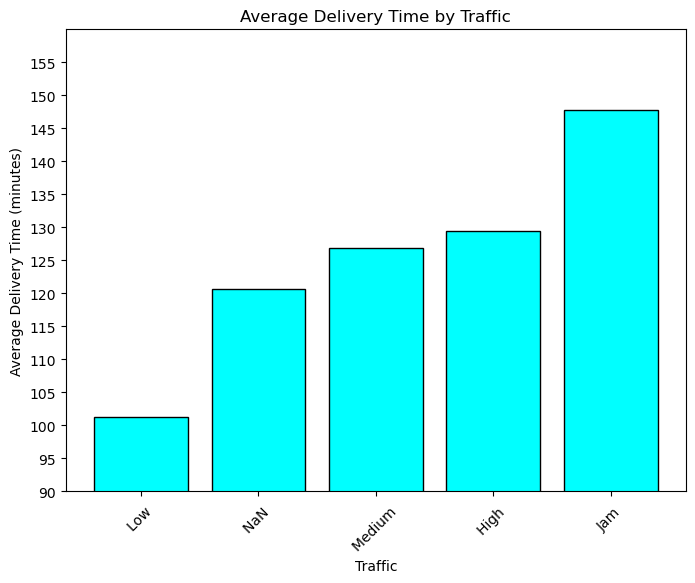

In [105]:
# Chart - 5 visualization code
# Group by Traffic and calculate mean Delivery_Time
traffic_delivery = df.groupby('Traffic')['Delivery_Time'].mean().sort_values()

# Plot
plt.figure(figsize=(8,6))
plt.bar(traffic_delivery.index, traffic_delivery.values, color='cyan', edgecolor='black')

# Labels and title
plt.xlabel("Traffic")
plt.ylabel("Average Delivery Time (minutes)")
plt.title("Average Delivery Time by Traffic")
plt.xticks(rotation=45)

# Y-axis from 100 to 140 with increments of 5
plt.ylim(90, 160)
plt.yticks(np.arange(90, 160, 5))

plt.show()

##### 1. Why did you pick the specific chart?
##### 2. What is/are the insight(s) found from the chart?
##### 3. Will the gained insights help creating a positive business impact?

I chose a bar chart to visualise and compare the average delivery times grouped by traffic descriptors i.e what is the average delivery time when traffic is high vs medium etc. When there is a traffic jam there tends to be a higher average delivery time hence the business could look into trying to avoid traffic jams somehow by exploring alternative routes etc. 

#### Chart - 7

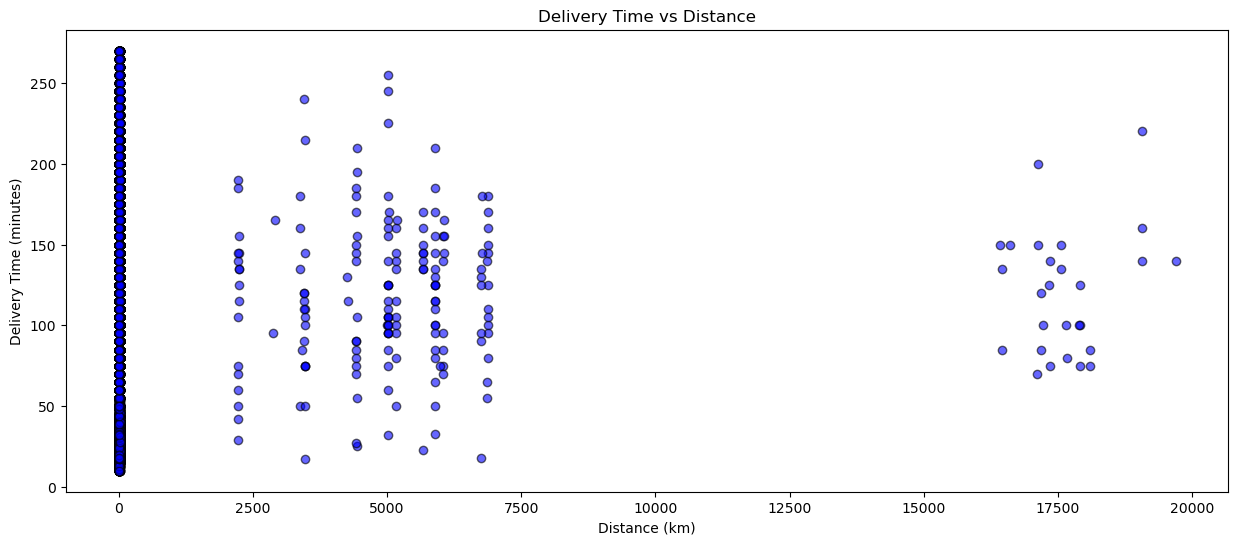

In [106]:
# Chart - 6 visualization code
# Scatter plot
plt.figure(figsize=(15,6))
plt.scatter(df['Distance_km'], df['Delivery_Time'], alpha=0.6, color='blue', edgecolor='black')

# Labels and title
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Delivery Time vs Distance")

plt.show()

##### 1. Why did you pick the specific chart?
##### 2. What is/are the insight(s) found from the chart?
##### 3. Will the gained insights help creating a positive business impact?

This is a scatter plot to visualise the correlation between distance and delivery time and distance. There is a wide spread of data  -> it appears there are many 0 values however in reality many distances are around 0-20 km. As we can see there isn't an immediate correlation between distance and delivery times which makes sense as other factors like traffic and weather also have an impact. 

In [107]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Order_Date', 'Order_Time',
       'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time',
       'Category', 'Distance_km'],
      dtype='object')

#### Chart - 8 - Correlation Heatmap

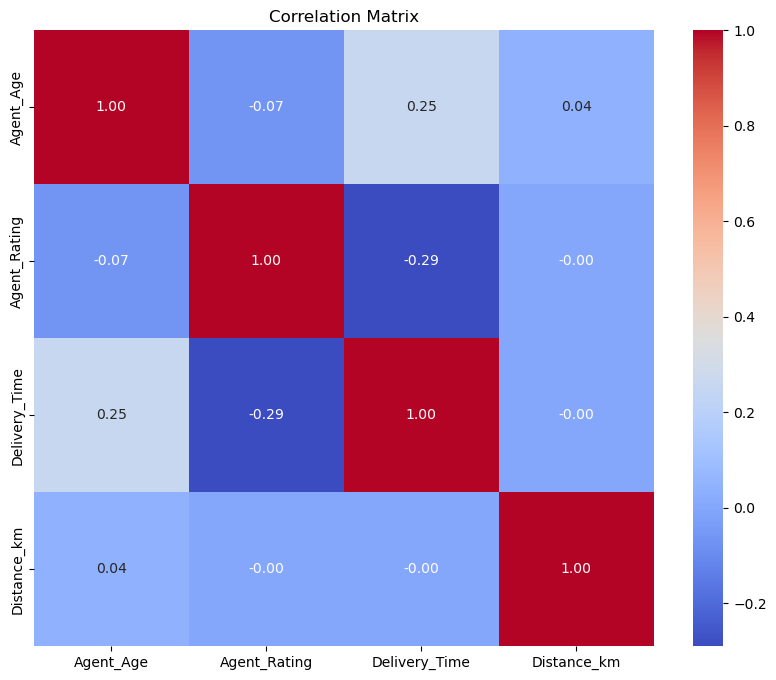

In [108]:
# Correlation Heatmap visualization code

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


##### 1. Why did you pick the specific chart?
##### 2. What is/are the insight(s) found from the chart?

I chose this visualisation to look at any linear correlations between features. As we can see there are no strong correlations between any features, there is a weak negative correlation between agent rating and delivery time which is interesting. 

#### Chart - 9-24 - Pair Plot

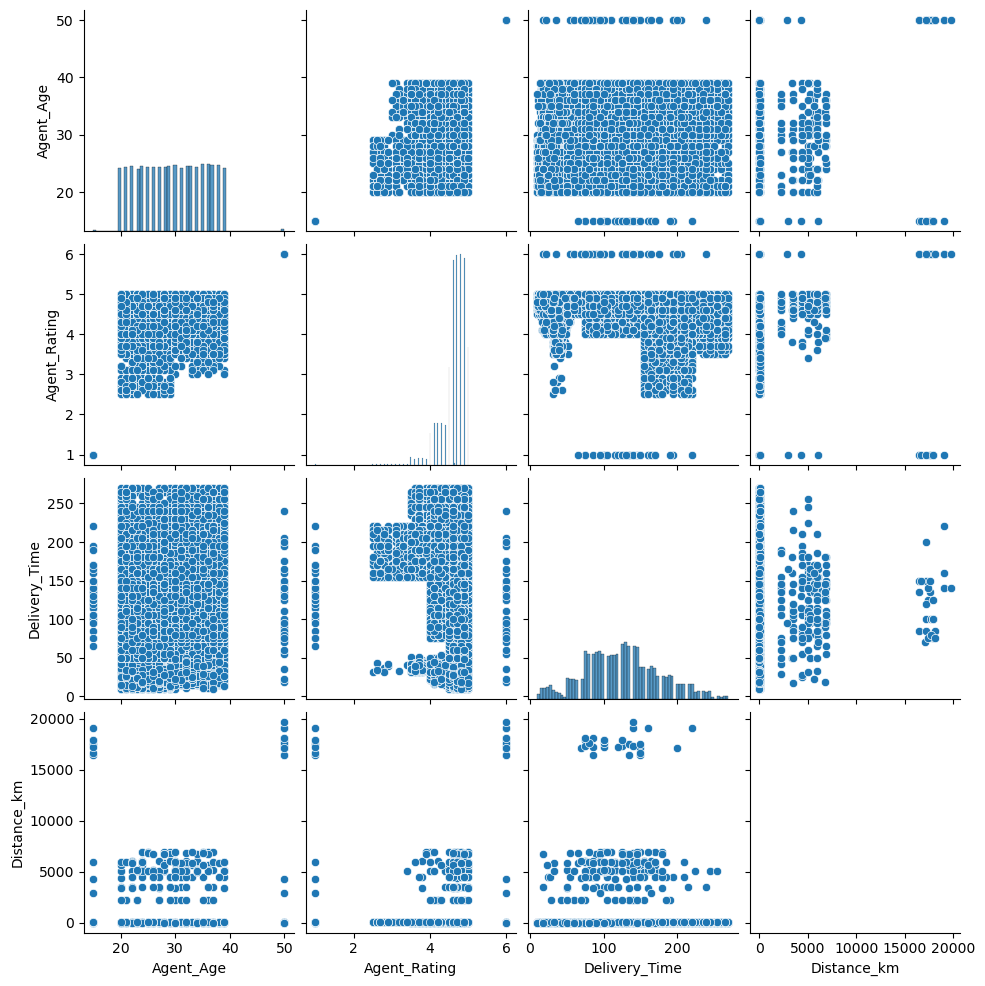

In [109]:
# Pair Plot visualization code


# Pairplot of all numeric columns
sns.pairplot(df)
plt.show()


##### 1. Why did you pick the specific chart?
##### 2. What is/are the insight(s) found from the chart?

I chose a pair plot to give a comprehensive visualisation that shows the correlation between different numeric features. Again there are no linear correlations so we can probably assume a linear regression model may not work very well. 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [110]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Order_ID         0
Agent_Age        0
Agent_Rating     0
Order_Date       0
Order_Time       0
Pickup_Time      0
Weather          0
Traffic          0
Vehicle          0
Area             0
Delivery_Time    0
Category         0
Distance_km      0
dtype: int64

We have cleaned the missing values previously in the notebook.

Answer Here.

### 2. Handling Outliers

In [111]:
# Handling Outliers & Outlier treatments

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through numeric columns and filter out outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Reset index after dropping rows
df = df.reset_index(drop=True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the IQR method. IQR is used because it is robust to extreme values and skewed distributions, making it a reliable way to detect and remove outliers without being distorted by them. This will: 

    Compute IQR per numeric feature.
    
    Drop rows where any numeric feature is outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
    
    Return a cleaned dataframe df ready for ML.

### 3. Categorical Encoding

In [112]:
# Encode your categorical columns
# One-hot encode categorical variables
data = df.copy()
df = pd.get_dummies(df, columns=["Weather", "Traffic", "Vehicle", "Area", "Category"], drop_first=True)


In [113]:
data.head()

,Order_ID,Agent_Age,Agent_Rating,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
0,ialx566343618,37,4.9,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758
3,rjto796129700,38,4.7,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,zguw716275638,32,4.6,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138


In [114]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Order_Date,Order_Time,Pickup_Time,Delivery_Time,Distance_km,Weather_Fog,Weather_Sandstorms,...,Category_Home,Category_Jewelry,Category_Kitchen,Category_Outdoors,Category_Pet Supplies,Category_Shoes,Category_Skincare,Category_Snacks,Category_Sports,Category_Toys
0,ialx566343618,37,4.9,2022-03-19,11:30:00,11:45:00,120,3.025149,False,False,...,False,False,False,False,False,False,False,False,False,False
1,akqg208421122,34,4.5,2022-03-25,19:45:00,19:50:00,165,20.183530,False,False,...,False,False,False,False,False,False,False,False,False,False
2,njpu434582536,23,4.4,2022-03-19,08:30:00,08:45:00,130,1.552758,False,True,...,False,False,False,False,False,False,False,False,True,False
3,rjto796129700,38,4.7,2022-04-05,18:00:00,18:10:00,105,7.790401,False,False,...,False,False,False,False,False,False,False,False,False,False
4,zguw716275638,32,4.6,2022-03-26,13:30:00,13:45:00,150,6.210138,False,False,...,False,False,False,False,False,False,False,False,False,True


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I used one hot encoding for nominal (no order) categorical features.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation



Time-based features → extract hour, day of week, etc. from Order_Date, Order_Time, and Pickup_Time.

In [80]:
# Extract time-based features 
# Convert to datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Order_Time"] = pd.to_datetime(df["Order_Time"], format="%H:%M:%S").dt.time
df["Pickup_Time"] = pd.to_datetime(df["Pickup_Time"], format="%H:%M:%S").dt.time

# Create datetime columns combining date + time
df["Order_DateTime"] = pd.to_datetime(df["Order_Date"].astype(str) + " " + df["Order_Time"].astype(str))
df["Pickup_DateTime"] = pd.to_datetime(df["Order_Date"].astype(str) + " " + df["Pickup_Time"].astype(str))

# Extract features
df["Order_Hour"] = df["Order_DateTime"].dt.hour
df["Order_DayOfWeek"] = df["Order_DateTime"].dt.dayofweek  # Monday=0, Sunday=6
df["Order_Month"] = df["Order_DateTime"].dt.month

# time gap between order and pickup (minutes)
df["Order_to_Pickup_Minutes"] = (df["Pickup_DateTime"] - df["Order_DateTime"]).dt.total_seconds() / 60.0

df[["Distance_km", "Order_Hour", "Order_DayOfWeek", "Order_Month", "Order_to_Pickup_Minutes"]].head()

,Distance_km,Order_Hour,Order_DayOfWeek,Order_Month,Order_to_Pickup_Minutes
0,3.025149,11,5,3,15.0
1,20.183530,19,4,3,5.0
2,1.552758,8,5,3,15.0
3,7.790401,18,1,4,10.0
4,6.210138,13,5,3,15.0


In [116]:
#doing the same for data 
# Extract time-based features 
# Convert to datetime
data["Order_Date"] = pd.to_datetime(data["Order_Date"])
data["Order_Time"] = pd.to_datetime(data["Order_Time"], format="%H:%M:%S").dt.time
data["Pickup_Time"] = pd.to_datetime(data["Pickup_Time"], format="%H:%M:%S").dt.time

# Create datetime columns combining date + time
data["Order_DateTime"] = pd.to_datetime(data["Order_Date"].astype(str) + " " + data["Order_Time"].astype(str))
data["Pickup_DateTime"] = pd.to_datetime(data["Order_Date"].astype(str) + " " + data["Pickup_Time"].astype(str))

# Extract features
data["Order_Hour"] = data["Order_DateTime"].dt.hour
data["Order_DayOfWeek"] = data["Order_DateTime"].dt.dayofweek  # Monday=0, Sunday=6
data["Order_Month"] = data["Order_DateTime"].dt.month

# Time gap between order and pickup (in minutes)
data["Order_to_Pickup_Minutes"] = (data["Pickup_DateTime"] - data["Order_DateTime"]).dt.total_seconds() / 60.0

# Show selected columns
data.head()


,Order_ID,Agent_Age,Agent_Rating,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Order_DateTime,Pickup_DateTime,Order_Hour,Order_DayOfWeek,Order_Month,Order_to_Pickup_Minutes
0,ialx566343618,37,4.9,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,2022-03-19 11:30:00,2022-03-19 11:45:00,11,5,3,15.0
1,akqg208421122,34,4.5,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,2022-03-25 19:45:00,2022-03-25 19:50:00,19,4,3,5.0
2,njpu434582536,23,4.4,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,2022-03-19 08:30:00,2022-03-19 08:45:00,8,5,3,15.0
3,rjto796129700,38,4.7,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,2022-04-05 18:00:00,2022-04-05 18:10:00,18,1,4,10.0
4,zguw716275638,32,4.6,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,2022-03-26 13:30:00,2022-03-26 13:45:00,13,5,3,15.0


#### 2. Feature Selection

In [117]:
# Select your features wisely to avoid overfitting
# Columns to drop
drop_cols = [
    "Order_ID",
    "Order_Date", "Order_Time", "Pickup_Time",
    "Order_DateTime", "Pickup_DateTime",
    "Store_Latitude", "Store_Longitude", "Drop_Latitude", "Drop_Longitude"
]

# Drop columns if they exist
df = df.drop(columns=[col for col in drop_cols if col in df.columns])
data = data.drop(columns=[col for col in drop_cols if col in data.columns])

In [118]:
df.head()

,Agent_Age,Agent_Rating,Delivery_Time,Distance_km,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,Weather_Windy,Traffic_Jam,...,Category_Home,Category_Jewelry,Category_Kitchen,Category_Outdoors,Category_Pet Supplies,Category_Shoes,Category_Skincare,Category_Snacks,Category_Sports,Category_Toys
0,37,4.9,120,3.025149,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,34,4.5,165,20.183530,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,23,4.4,130,1.552758,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,38,4.7,105,7.790401,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,32,4.6,150,6.210138,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [119]:
data.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Order_Hour,Order_DayOfWeek,Order_Month,Order_to_Pickup_Minutes
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,11,5,3,15.0
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,19,4,3,5.0
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,8,5,3,15.0
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,18,1,4,10.0
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,13,5,3,15.0


In [121]:
# Save processed DataFrame
df.to_csv("processed_data.csv", index=False)  # CSV format
data.to_csv("Processed_data_for_boosting.csv", index=False)


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionaility reduction doesn't need to be done here as there aren't hundreds or more columns. 

# **Conclusion**

## Files explanation 

### Code files

**initial_models.py** - This used the processed dataset created from the jupyter notebook to train a variety of models and compare them + their metrics using MLflow. Then after training the models, i used optuna hyperparameter tuning to to optimise for the best parameters/ the parameters that return the best metrics. Models used: Linear Regression, RandomForestRegressor, GradientBoostingRegressor

**final_models.py** - This used a processed dataset (that didn't peform one hot encoding immediately) to train a range of XGboost models + track the metrics in MLflow. I again used hyperparameter tuning. I saved the results into a .pkl file using joblib to use these results in the streamlit app. 

**app.py** - This is the streamlit code for an interactive dashboard/website to predict delivery times. 

### .csv files 

**processed_data.csv** - This is the processed dataset for the initial_models.py file as these models need slightly different preprocessing steps such as categorical encoding. 

**Processed_Data_for_boosting.csv** - This is the processed data for the final_models.py file which has fewer features. 

#### .pkl files 

**best_random_forest.pkl** - This saves the best random forest model as a pkl file as i thought i would use this in the end streamlit code but i didn't. This was the best model out of all the linear regression, Gradient boosting regressor and random forest regressor models. 

**best_xgboost.pkl** - This saves the best xgboost model as a .pkl file to then be used in the streamlit code (app.py). This was the actual model i used for the streamlit code. 






## MLflow images 

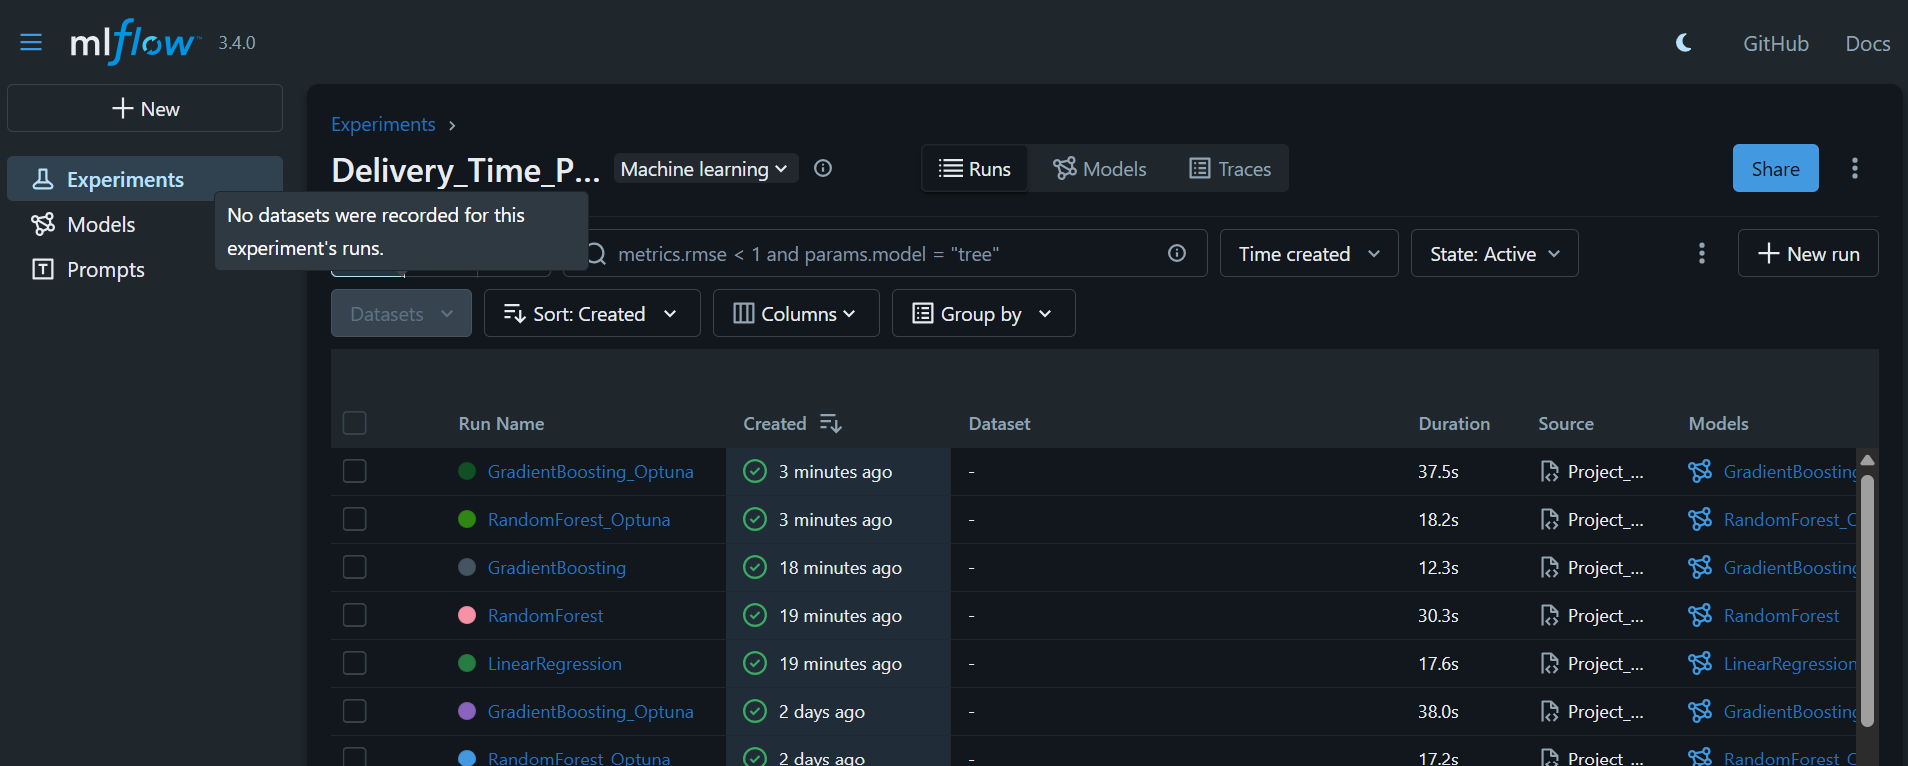


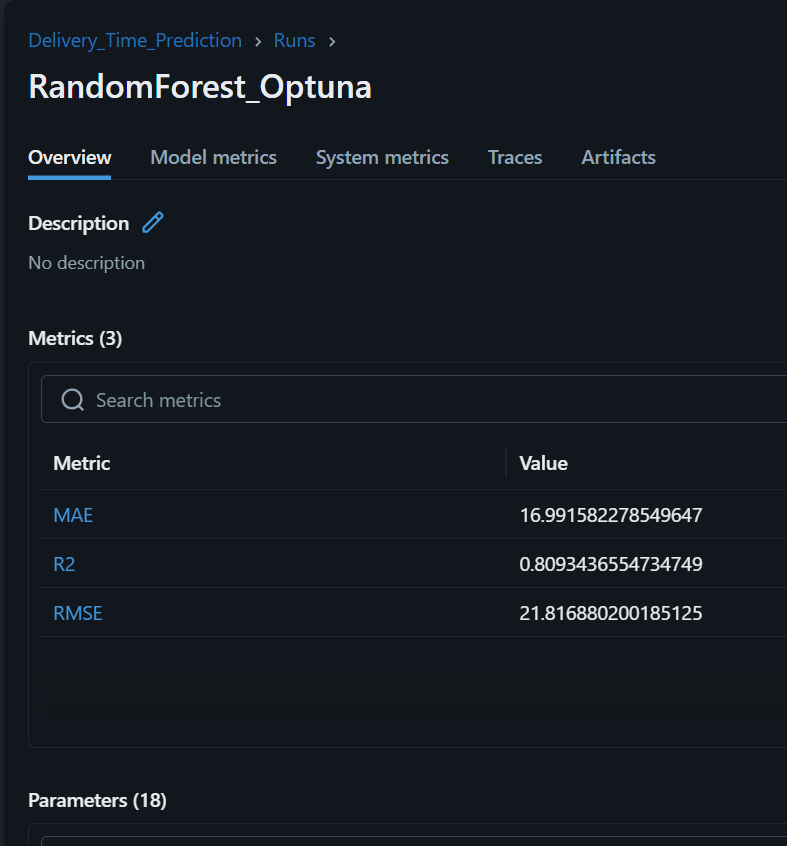

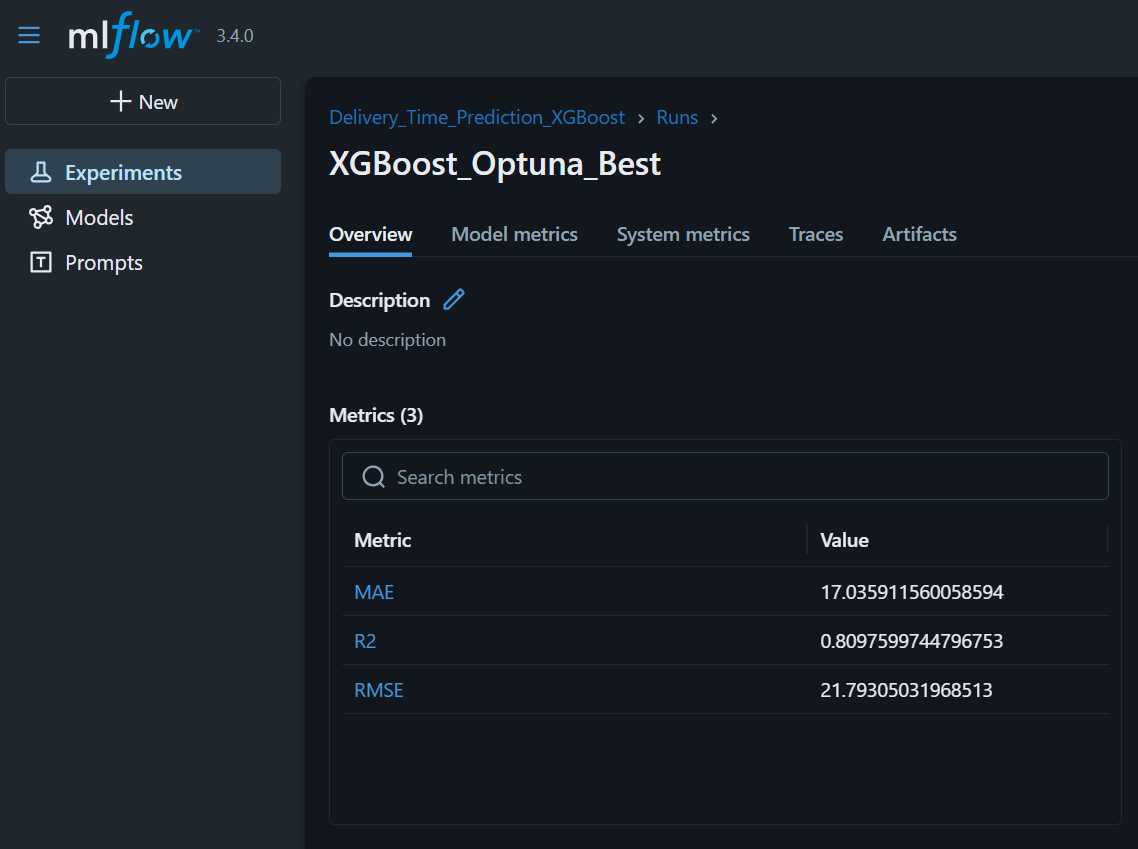

The above image shows the best model was the XGboost model after hyperparameter tuning with an R^2 score of 0.8097 whereas the best model from the inital models i trained was the random forest regressor model after hyperparameter tuning which has an R^2 score of 0.8093.

example image of streamlit app:
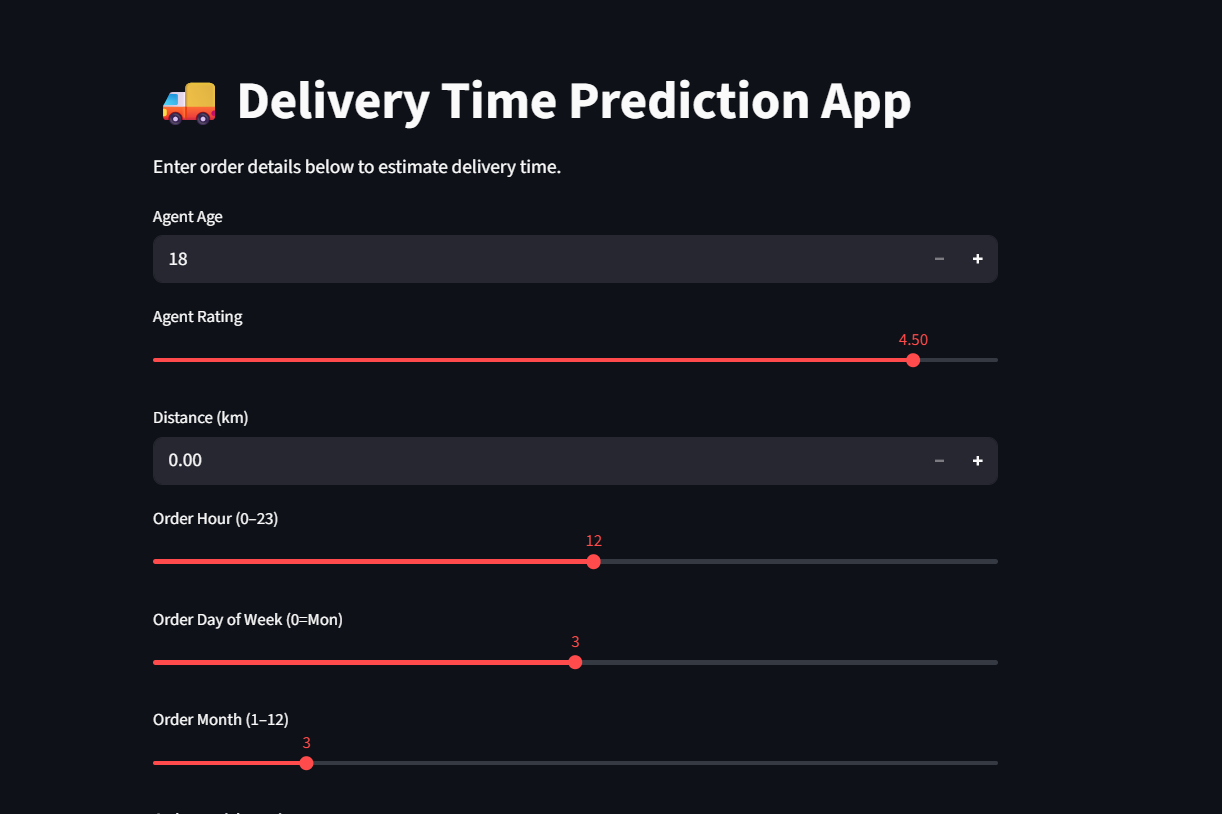

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***